# Section 1 Project : 다음 분기에 어떤 게임을 설계해야 할까.

1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
4. 출고량이 높은 지역과 트렌드 분석 
5. 결론

In [229]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font', family='NanumBarunGothic') 

In [231]:
#원본데이터 눈으로 살펴보기
df0 = pd.read_csv('/content/vgames2.csv', index_col = 0)
df0

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


Sales 칼럼들에서 M, K로 표기된 것을 발견, 엑셀에서 전처리.

In [232]:
df = pd.read_csv('/content/vgames.csv', index_col = 0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [233]:
df1 = pd.read_csv('/content/vgames.csv', index_col = 0)
#원본 데이터는 놔두고 중복치 없애기 위한 새로운 데이터 프레임

In [234]:
df1 = df1.drop_duplicates( ['Name', 'Platform'] )
#이름과 플랫폼 중복인 항목 제거 

In [235]:
df1 = df1.drop_duplicates()
#모든 내용 중복인 항목 제거

In [236]:
df.shape, df1.shape
#중복 심한 행 5개 제거 확인

((16598, 9), (16593, 9))

In [237]:
df1 = df1.dropna(axis=0)
df1
#결측치가 있는 행 358개 모두 제거

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [238]:
df = df1
#이후 분석의 편의성을 위해 df로 지정

In [239]:
df['Year'] = df['Year'].astype(int)

In [240]:
#'Year'칼럼에서 이상치 기록된 항목 삭제
wy = df[df['Year'] <= 1000].index
df3 = df.drop(wy)
df3['Year']

1        2008
2        2009
3        2010
4        2010
5        2010
         ... 
16594    2006
16595    2005
16596    2015
16597    2013
16598    1996
Name: Year, Length: 16135, dtype: int64

In [241]:
df['Year'] = df3['Year']

In [242]:
#전처리 끝
df
#원본 데이터의 약 2.187% 제거

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 1. 지역에 따라서 선호하는 게임 장르가 다를까

In [243]:
df['Genre'].value_counts()

Action          3240
Sports          2298
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1266
Racing          1217
Platform         872
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [244]:
#지역별 분석을 위한 df 생성
nadf = df[['Genre', 'NA_Sales']]
eudf = df[['Genre', 'EU_Sales']]
jpdf = df[['Genre', 'JP_Sales']]
otdf = df[['Genre', 'Other_Sales']]

In [245]:
# 북미대륙 장르별 판매량
nagroup = nadf.groupby(nadf["Genre"])

In [246]:
# 북미대륙 장르별 판매량 총합
nas = nagroup.sum()

In [247]:
# 북미대륙 장르별 판매량 총합 내림차순 정렬
nas.sort_values(by = ['NA_Sales'], ascending=False)

,NA_Sales
Genre,
Action,858.75
Sports,667.26
Shooter,574.48
Platform,444.97
Misc,394.73
Racing,353.70
Role-Playing,318.76
Fighting,220.35
Simulation,181.43


In [248]:
#그래프를 그리기 위해 데이터 프레임 생성
#nasg = nasg(raphic)
nasg = nas.sort_values(by = ['NA_Sales'], ascending=False)
nasg

,NA_Sales
Genre,
Action,858.75
Sports,667.26
Shooter,574.48
Platform,444.97
Misc,394.73
Racing,353.70
Role-Playing,318.76
Fighting,220.35
Simulation,181.43


In [249]:
nasg.reset_index(drop=False, inplace=True)

In [250]:
nasg

,Genre,NA_Sales
0,Action,858.75
1,Sports,667.26
2,Shooter,574.48
3,Platform,444.97
4,Misc,394.73
5,Racing,353.70
6,Role-Playing,318.76
7,Fighting,220.35
8,Simulation,181.43
9,Puzzle,121.58


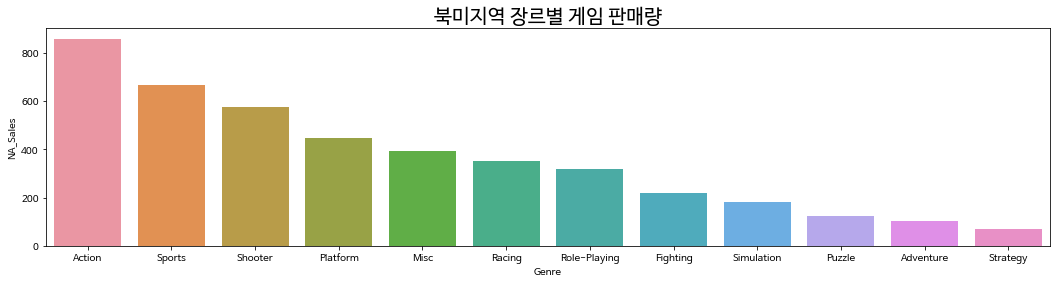

In [251]:
#북미 판매량
plt.figure(figsize=(18,4))
plt.title("북미지역 장르별 게임 판매량", size= 20)
sns.barplot(data = nasg,
           x = "Genre",
           y = "NA_Sales")

In [252]:
# 유럽대륙 판매량
eudf

,Genre,EU_Sales
1,Action,0.00
2,Action,0.00
3,Adventure,0.00
4,Misc,0.00
5,Platform,0.09
...,...,...
16594,Platform,0.04
16595,Action,0.00
16596,Sports,0.19
16597,Action,0.05


In [253]:
# 유럽대륙 장르별 판매량
eugroup = eudf.groupby(eudf["Genre"])
# 유럽대륙 장르별 판매량 총합
eus = eugroup.sum()
# 유럽대륙 장르별 판매량 총합 내림차순 정렬
eus.sort_values(by = ['EU_Sales'], ascending=False)

,EU_Sales
Genre,
Action,513.64
Sports,370.96
Shooter,310.23
Racing,234.79
Misc,208.15
Platform,200.56
Role-Playing,183.09
Simulation,112.99
Fighting,99.90


In [254]:
#그래프를 그리기 위해 데이터 프레임 생성
#eusg = eusg(raphic)
eusg = eus.sort_values(by = ['EU_Sales'], ascending=False)
eusg.reset_index(drop=False, inplace=True)

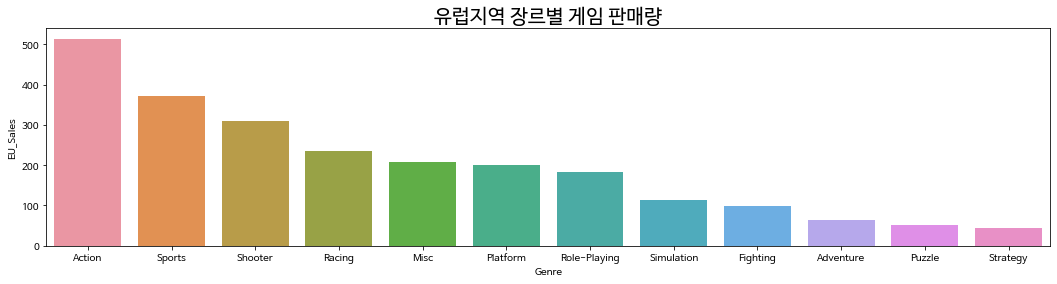

In [255]:
#유럽 판매량
plt.figure(figsize=(18,4))
plt.title("유럽지역 장르별 게임 판매량", size= 20)
sns.barplot(data = eusg,
           x = "Genre",
           y = "EU_Sales")

In [256]:
# 일본 판매량
jpdf
# 일본 장르별 판매량
jpgroup = jpdf.groupby(jpdf["Genre"])
# 일본 장르별 판매량 총합
jps = jpgroup.sum()
# 일본 장르별 판매량 총합 내림차순 정렬
jps.sort_values(by = ['JP_Sales'], ascending=False)

,JP_Sales
Genre,
Role-Playing,342.93
Action,156.60
Sports,134.76
Platform,130.49
Misc,104.18
Fighting,87.14
Simulation,63.54
Racing,56.30
Puzzle,56.24


In [257]:
#그래프를 그리기 위해 데이터 프레임 생성
#jpsg = jpsg(raphic)
jpsg = jps.sort_values(by = ['JP_Sales'], ascending=False)
jpsg

,JP_Sales
Genre,
Role-Playing,342.93
Action,156.60
Sports,134.76
Platform,130.49
Misc,104.18
Fighting,87.14
Simulation,63.54
Racing,56.30
Puzzle,56.24


In [258]:
jpsg.reset_index(drop=False, inplace=True)

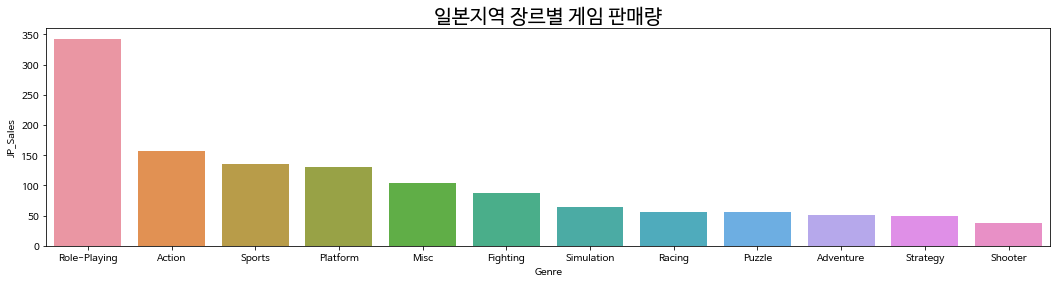

In [259]:
#일본 판매량
plt.figure(figsize=(18,4))
plt.title("일본지역 장르별 게임 판매량", size= 20)
sns.barplot(data = jpsg,
           x = "Genre",
           y = "JP_Sales")

In [260]:
# 기타국가 판매량
otdf
# 기타국가 장르별 판매량
otgroup = otdf.groupby(otdf["Genre"])
# 기타국가 장르별 판매량 총합
ots = otgroup.sum()
# 기타국가 장르별 판매량 총합 내림차순 정렬
ots.sort_values(by = ['Other_Sales'], ascending=False)

,Other_Sales
Genre,
Action,183.99
Sports,132.35
Shooter,101.86
Racing,76.39
Misc,72.64
Role-Playing,56.73
Platform,50.79
Fighting,36.15
Simulation,31.32


In [261]:
#그래프를 그리기 위해 데이터 프레임 생성
#otsg = otsg(raphic)
otsg = ots.sort_values(by = ['Other_Sales'], ascending=False)
otsg.reset_index(drop=False, inplace=True)
otsg

,Genre,Other_Sales
0,Action,183.99
1,Sports,132.35
2,Shooter,101.86
3,Racing,76.39
4,Misc,72.64
5,Role-Playing,56.73
6,Platform,50.79
7,Fighting,36.15
8,Simulation,31.32
9,Adventure,16.70


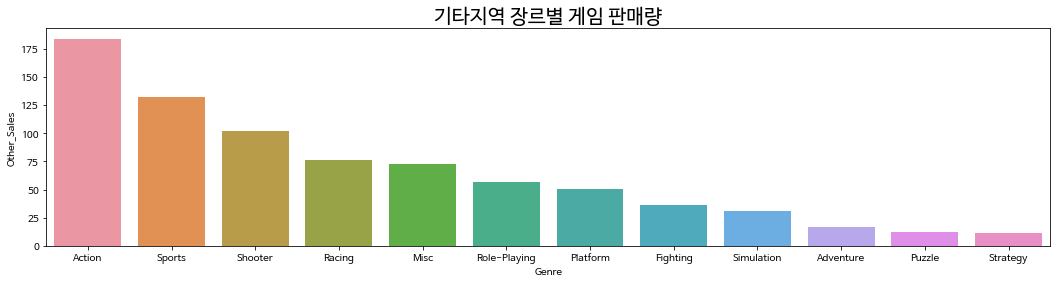

In [262]:
#기타 판매량
plt.figure(figsize=(18,4))
plt.title("기타지역 장르별 게임 판매량", size= 20)
sns.barplot(data = otsg,
           x = "Genre",
           y = "Other_Sales")

# 분석 결과

1. 지역에 따라서 선호하는 게임 장르가 다를까?

# 결론 : 지역에 따라서 선호하는 게임 장르가 다른 것으로 나타났다.

북미, 유럽, 기타지역은 공통적으로 Action, Sports, Shooter 장르가 1, 2, 3위를 기록했다. 그리고 Misc, Racing 장르는 공통적으로 6위 안에 위치했다. 이에 더해 북미와 유럽지역에서는 Platform장르가 6위 이내에 위치했지만, 기타국가 판매량에서는 Platform 장르대신 Role-Playing 장르가 6위를 기록했다.

일본 지역은 Role-Playing 장르가 2위인 Action 장르의 2배가 넘는 매출을 기록하며 Role-Playing, Action, Sports, Platform, Misc, Fighting 장르 순서로 매출을 기록했다.

이에따라 일본 지역에서는 Role-Playing장르를 가장 선호하고, 북미, 유럽, 기타 지역에서는 Action 장르를 가장 선호한다는 정보를 얻었다.

# 2. 연도별 게임의 트렌드가 있을까?

In [263]:
#가장 오래된 출시년도와 가장 최근 출시년도 검색
df['Year'].min(), df['Year'].max()

(1980.0, 2020.0)

In [264]:
#카운트 결과 2020년 출시된 게임은 1가지 뿐이기 때문에 결과에서 제외함.
df['Year'].value_counts()

2009.0    1418
2008.0    1413
2010.0    1245
2007.0    1191
2011.0    1123
2006.0     997
2005.0     929
2002.0     823
2003.0     767
2004.0     736
2012.0     648
2015.0     606
2014.0     578
2013.0     543
2001.0     478
1998.0     374
2000.0     345
2016.0     337
1999.0     336
1997.0     287
1996.0     259
1995.0     215
1994.0     120
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      20
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [265]:
#연도별 트렌드 분석을 위한 데이터프레임 만들기
# dft = df trend
dft = df[['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
          'JP_Sales', 'Other_Sales']]

In [266]:
dft["Total_Sales"] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [267]:
dft = dft.drop(['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales'], axis = 1)
dft

,Platform,Year,Genre,Publisher,Total_Sales
1,DS,2008.0,Action,Destineer,0.04
2,Wii,2009.0,Action,Namco Bandai Games,0.18
3,PSP,2010.0,Adventure,Alchemist,0.02
4,DS,2010.0,Misc,Zoo Games,0.04
5,PS3,2010.0,Platform,D3Publisher,0.25
...,...,...,...,...,...
16594,GC,2006.0,Platform,Vivendi Games,0.20
16595,PSP,2005.0,Action,Rising Star Games,0.01
16596,PS3,2015.0,Sports,Take-Two Interactive,0.79
16597,PSV,2013.0,Action,Tecmo Koei,0.38


In [268]:
#카운트 결과 2020년 출시된 게임은 1가지 뿐이기 때문에 데이터프레임에서 제외함.
index2020 = dft[dft["Year"] == 2020].index
dft = dft.drop(index2020)

In [269]:
#10년 단위로 출시된 게임 카운트
for x in range(1980, 2019, 10):
    start = x
    end = x+10
    temp = df[(dft["Year"] >= start) & (df["Year"] < end)]
    print("{}년 이후 {}년 이전 : {}".format(start, end, temp["Year"].count()))

1980년 이후 1990년 이전 : 203
1990년 이후 2000년 이전 : 1751
2000년 이후 2010년 이전 : 9097
2010년 이후 2020년 이전 : 5083


In [270]:
#10년 단위 게임으로 데이터프레임을 쪼개기 위해 cut함수와 groupby함수 사용
#일단 라벨링을 위해 범위 설정

bins = list(range(1980, 2021, 10))
bins_label = [str(x)+"년 이후 "+str(x+10)+"년 이전" for x in bins]

In [271]:
dft["Decade"] = pd.cut(df["Year"], bins, right=False, labels=bins_label[:-1])

In [272]:
dft

,Platform,Year,Genre,Publisher,Total_Sales,Decade
1,DS,2008.0,Action,Destineer,0.04,2000년 이후 2010년 이전
2,Wii,2009.0,Action,Namco Bandai Games,0.18,2000년 이후 2010년 이전
3,PSP,2010.0,Adventure,Alchemist,0.02,2010년 이후 2020년 이전
4,DS,2010.0,Misc,Zoo Games,0.04,2010년 이후 2020년 이전
5,PS3,2010.0,Platform,D3Publisher,0.25,2010년 이후 2020년 이전
...,...,...,...,...,...,...
16594,GC,2006.0,Platform,Vivendi Games,0.20,2000년 이후 2010년 이전
16595,PSP,2005.0,Action,Rising Star Games,0.01,2000년 이후 2010년 이전
16596,PS3,2015.0,Sports,Take-Two Interactive,0.79,2010년 이후 2020년 이전
16597,PSV,2013.0,Action,Tecmo Koei,0.38,2010년 이후 2020년 이전


In [273]:
#dft에서 결측치가 있는 행 제거'
dft = dft.dropna(axis=0)

In [274]:
df0.shape, dft.shape

((16598, 9), (16134, 6))

In [275]:
#결측를 제거해도 원본 데이터의 약 2.8%이기 때문에 
#결측치를 제거해도 분석을 진행하는데 문제가 없다고 판단함
(16598-16134)/16598

0.027955175322327993

In [276]:
#10년 단위로 끊어서 데이터프레임 생성
dft1980 = dft[dft['Decade'] == '1980년 이후 1990년 이전']
dft1990 = dft[dft['Decade'] == '1990년 이후 2000년 이전']
dft2000 = dft[dft['Decade'] == '2000년 이후 2010년 이전'] 
dft2010 = dft[dft['Decade'] == '2010년 이후 2020년 이전']

In [277]:
# 트렌드를 분석해줄 함수 생성
def trend(a) :
    platform = a['Platform'].value_counts().head(3)
    genre = a['Genre'].value_counts().head(3)
    publisher =a['Publisher'].value_counts().head(3)
    
    return platform, genre, publisher

In [278]:
trend(dft1980)

(2600    115
 NES      74
 GB       11
 Name: Platform, dtype: int64, Action      66
 Platform    32
 Shooter     30
 Name: Genre, dtype: int64, Nintendo      47
 Atari         42
 Activision    25
 Name: Publisher, dtype: int64)

In [279]:
trend(dft1990)

(PS      908
 N64     242
 SNES    236
 Name: Platform, dtype: int64, Sports      303
 Fighting    191
 Racing      179
 Name: Genre, dtype: int64, Sony Computer Entertainment     155
 Nintendo                        123
 Konami Digital Entertainment    119
 Name: Publisher, dtype: int64)

In [280]:
trend(dft2000)

(PS2    2066
 DS     1604
 Wii     831
 Name: Platform, dtype: int64, Action    1573
 Sports    1397
 Misc       991
 Name: Genre, dtype: int64, Electronic Arts    881
 Ubisoft            582
 Activision         568
 Name: Publisher, dtype: int64)

In [281]:
trend(dft2010)

(PS3     878
 X360    677
 DS      505
 Name: Platform, dtype: int64, Action    1429
 Sports     566
 Misc       557
 Name: Genre, dtype: int64, Namco Bandai Games    459
 Activision            337
 Electronic Arts       336
 Name: Publisher, dtype: int64)

# 연도별 게임의 트렌드가 있을까?

# 분석결과 : 연도별 게임의 트렌드가 존재한다.

1980년대 :

플랫폼 : 아타리 2600(115), Nes(닌텐도 엔터테인먼트 시스템, 패미컴, 74),  GB(게임보이, 11)

장르 : Action(66), Platform(32), Shooter(30)

발행사 : 닌텐도(47), 아타리(42), 액티비전(25)

1990년대 :

플랫폼 : PS(플레이스테이션, 908), N64(닌텐도64, 242), SNES(슈퍼 패미컴, 236)

장르 : Sports(303), Fighting(191), Racing(179)

발행사 : Sony Computer Entertainment(155), Nintendo(123), Konami Digital Entertainment(119)

2000년대 :

플랫폼 :  PS2(2066), DS(1604), Wii(831)

장르 :  Action(1573), Sports(1397), Misc(991)

발행사 :  Electronic Arts(881), Ubisoft(582), Activision(568)

2010년대 : 

플랫폼 :  PS3(878), X360(677), DS(505)

장르 :  Action(1429), Sports(566), Misc(557)

발행사 :  Namco Bandai Games(459), Activision(337), Electronic Arts(336)

1980년대 : 일본 플랫폼이 상위를 차지하며, Platform, Shooter장르가 유일하게 판매량 3위 이내에 위치한 시기. 

1990년대 : 1994년 플레이 스테이션의 등장이후 최다 플랫폼과 발행사 모두 일본 기업이 차지한 일본 게임의 10년, 그리고 유일하게 Action장르가 상위 3위권에 포함되지 못한 시기다.

2000년대 : 최다 플랫폼수에서 여전히 일본기업의 강세를 보였으나, 최다 게임발행사(Publisher)은 미국 기업들이 두각을 드러낸 시기

2010년대 : 일본기업의 최다 플랫폼 순위와 Action, Sports, Misc라는 장르의 고착화가 이뤄졌으며, 2000년대 미국이 장악했던 게임발행사의 1위 자리를 Namco Bandai Games가 차지했다.

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [282]:
#3번문제 데이터 프레임 생성
df3 = df

In [283]:
#총 매출인 전체 매출(Total_Sales를 생성)
df3['Total_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [284]:
# 보다 자세한 분석을 위해 2번 과제를 해결할 때 사용한 'Decade' 컬럼을 가져온다

df3 = pd.concat([df3, dft['Decade']], axis = 1)

In [285]:
df3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Decade
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2000년 이후 2010년 이전
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,2000년 이후 2010년 이전
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,2010년 이후 2020년 이전
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,2010년 이후 2020년 이전
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,2010년 이후 2020년 이전
...,...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,2000년 이후 2010년 이전
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,2000년 이후 2010년 이전
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,2010년 이후 2020년 이전
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,2010년 이후 2020년 이전


In [286]:
df3 = df3.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis =1)

In [287]:
df3.head()

,Name,Platform,Year,Genre,Publisher,Total_Sales,Decade
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,2000년 이후 2010년 이전
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.18,2000년 이후 2010년 이전
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.02,2010년 이후 2020년 이전
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,2010년 이후 2020년 이전
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.25,2010년 이후 2020년 이전


In [288]:
# '출고량이 높은 게임'을 '매출 상위 20% 게임'이라고 정의하고 분석 진행
# 상위 20%추출을 위해 데이터프레임의 20% 개수 계산
16235*0.2

3247.0

In [289]:
#상위 20%(출고량이 높은 게임) 추출
df3top20 = df3.sort_values(by='Total_Sales' ,ascending=False).head(3247)
df3top20

,Name,Platform,Year,Genre,Publisher,Total_Sales,Decade
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74,2000년 이후 2010년 이전
4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,1980년 이후 1990년 이전
12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.83,2000년 이후 2010년 이전
3353,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00,2000년 이후 2010년 이전
7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.38,1990년 이후 2000년 이전
...,...,...,...,...,...,...,...
5097,Madden NFL 2003,GBA,2002.0,Sports,Electronic Arts,0.61,2000년 이후 2010년 이전
2902,Harry Potter and the Goblet of Fire,GBA,2005.0,Action,Electronic Arts,0.61,2000년 이후 2010년 이전
11672,Wet,PS3,2009.0,Shooter,Bethesda Softworks,0.61,2000년 이후 2010년 이전
8875,Tony Hawk: RIDE,PS3,2009.0,Sports,Activision,0.61,2000년 이후 2010년 이전


In [290]:
# 판매량과 연관이 없을 것 같은 'Name'컬럼을 지우고 전처리 끝
df3top20 = df3top20.drop('Name', axis = 1)

In [291]:
df3top20

,Platform,Year,Genre,Publisher,Total_Sales,Decade
2909,Wii,2006.0,Sports,Nintendo,82.74,2000년 이후 2010년 이전
4200,NES,1985.0,Platform,Nintendo,40.24,1980년 이후 1990년 이전
12580,Wii,2008.0,Racing,Nintendo,35.83,2000년 이후 2010년 이전
3353,Wii,2009.0,Sports,Nintendo,33.00,2000년 이후 2010년 이전
7830,GB,1996.0,Role-Playing,Nintendo,31.38,1990년 이후 2000년 이전
...,...,...,...,...,...,...
5097,GBA,2002.0,Sports,Electronic Arts,0.61,2000년 이후 2010년 이전
2902,GBA,2005.0,Action,Electronic Arts,0.61,2000년 이후 2010년 이전
11672,PS3,2009.0,Shooter,Bethesda Softworks,0.61,2000년 이후 2010년 이전
8875,PS3,2009.0,Sports,Activision,0.61,2000년 이후 2010년 이전


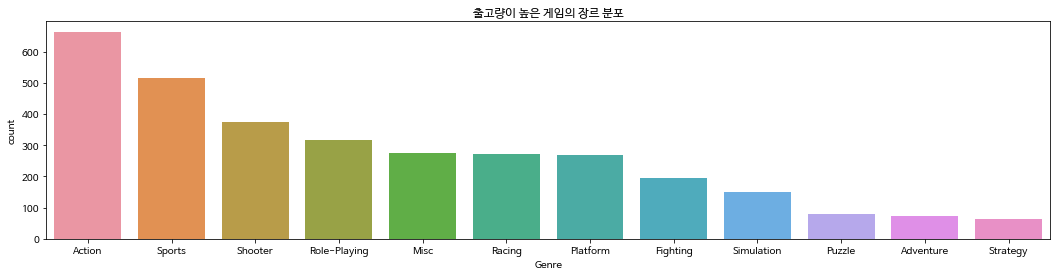

In [292]:
#출고량이 높은 게임의 장르 분포
plt.figure(figsize=(18,4))
plt.title("출고량이 높은 게임의 장르 분포")
sns.countplot(x = 'Genre', data = df3top20,
              order = df3top20['Genre'].value_counts().index)

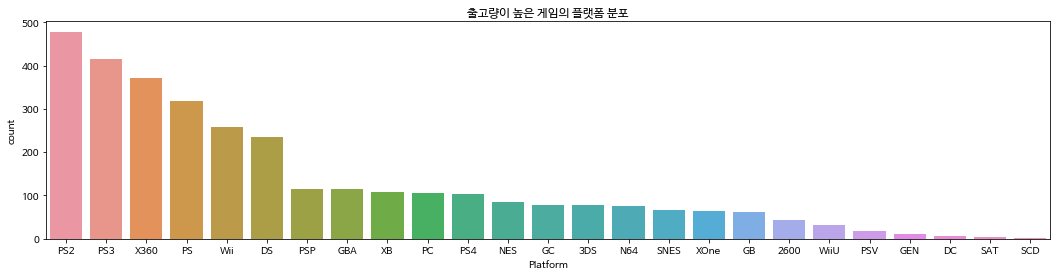

In [293]:
#출고량이 높은 게임의 플랫폼 분포
plt.figure(figsize=(18,4))
plt.title("출고량이 높은 게임의 플랫폼 분포")
sns.countplot(x = 'Platform', data = df3top20,
              order = df3top20['Platform'].value_counts().index)

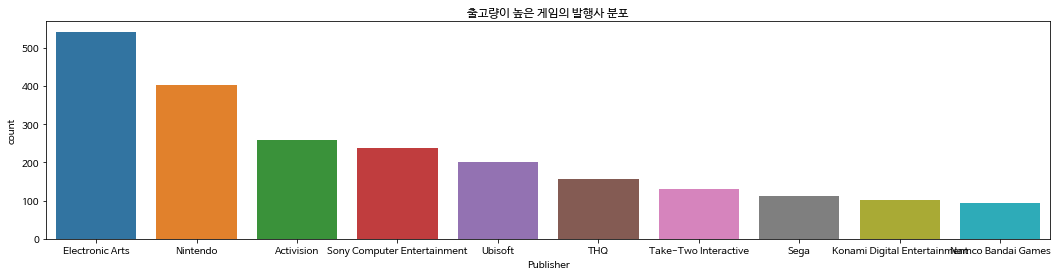

In [294]:
#출고량이 높은 상위 20위 이내 게임의 발행사 분포
plt.figure(figsize=(18,4))
plt.title("출고량이 높은 게임의 발행사 분포")
sns.countplot(x = 'Publisher', data = df3top20,
              order = df3top20['Publisher'].value_counts().head(10).index)

# 4. 다음 분기에 설계해야할 게임

---
다음분기에 설계해야할 게임은 안정적인 매출이 나와야한다. 그렇기 위해서는 다음과 같은 조건을 충족해야 한다.

1. 2010 - 2019년의 게임 트렌드(장르, 플랫폼)를 따라갈 것.
2. 지역에 따라 판매량의 차이가 어느 정도인지 분석하고, 반영할 것.


4-1.

2번 분석에서 나온 결과를 토대로 2010년대(2010년 - 2019년)의 게임트렌드 추출

플랫폼 :  PS3(878), X360(677), DS(505)

장르 :  Action(1429), Sports(566), Misc(557)

발행사 :  Namco Bandai Games(459), Activision(337), Electronic Arts(336)

In [295]:
df.head(1)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.0,0.0,0.0,0.04


In [296]:
df4 = df[['NA_Sales', 'EU_Sales',	'JP_Sales',	'Other_Sales', 'Total_Sales']]

In [297]:
df4

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,0.04,0.00,0.00,0.00,0.04
2,0.17,0.00,0.00,0.01,0.18
3,0.00,0.00,0.02,0.00,0.02
4,0.04,0.00,0.00,0.00,0.04
5,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...
16594,0.15,0.04,0.00,0.01,0.20
16595,0.01,0.00,0.00,0.00,0.01
16596,0.44,0.19,0.03,0.13,0.79
16597,0.05,0.05,0.25,0.03,0.38


4-2
지역별 판매량(구매력) 추출

In [298]:
#각 지역별 구매량 총합
df4['NA_Sales'].sum() , df4['EU_Sales'].sum(), df4['JP_Sales'].sum() , df4['Other_Sales'].sum()

(4305.63, 2393.26, 1271.21, 782.59)

In [299]:
#전체 지역 게임 구매력 총합
df4['Total_Sales'].sum()

8752.689999999999

In [300]:
print('북미지역 지분 :', (df4['NA_Sales'].sum()/df4['Total_Sales'].sum())*100, '%',
      '유럽지역 지분 :', (df4['EU_Sales'].sum()/df4['Total_Sales'].sum())*100, '%',
      '일본지역 지분 :', (df4['JP_Sales'].sum()/df4['Total_Sales'].sum())*100, '%',
      '기타지역 지분 :', (df4['Other_Sales'].sum()/df4['Total_Sales'].sum())*100, '%')

북미지역 지분 : 49.192076950057654 % 유럽지역 지분 : 27.3431367956594 % 일본지역 지분 : 14.523649300957766 % 기타지역 지분 : 8.94113695332521 %


북미지역의 판매율이 전체의 약 49%를 차지하고 있기 때문에, 다음 분기에 설계해야 할 게임은 북미지역의 트렌드에 맞춰 설계해야한다.

1번 분석에서 북미 지역은 Action, Sports, shooter 장르를 선호하는 경향을 보였다.

2번 분석에서 나온 결과를 토대로 2010년대(2010년 - 2019년)의 게임트렌드는 

플랫폼 : PS3(878), X360(677), DS(505)

장르 : Action(1429), Sports(566), Misc(557)

발행사 : Namco Bandai Games(459), Activision(337), Electronic Arts(336)이었다. 

# 결론 : 

분석 결과들을 종합해본 결과, 다음 분기에 설계해야 할 게임은

1. Platform = "PS3",
2. Genre = "Action",
3. Publisher = "Namco Bandai Games"

라는 세 가지 조건을 만족하는 게임이다.

# 보완해야할 점

1. 전처리 단계에서 판다스를 이용하지 못하고 엑셀로 진행해서 실수로 인한 오류가 있을 수도 있다. 동시에 전처리 단계에서 시간을 너무 낭비해서 제대로 된 분석을 하는 시간이 충분하지 않았다.

2. 전처리 단계에서 임의로 3% 미만의 자료를 삭제하고 분석을 진행했는데, 여기서 사라진 자료들이 이후 분석에 어떤 영향을 끼칠 수 있는 지 검증하지 않았다.

3. 분석을 끝내고 결론을 작성한 이후에 'Genre'와 'Publisher'라는 feature 사이에 상관관계가 있을 수 있다는 생각이 들었다. 'Genre'의 구분 기준을 자세히 알 수는 없지만 경험적으로 "Namco Bandai Games"보다는 "Activision"과 "Electronic Arts"의 Action장르 게임이 더 많을 것이라는 생각이 들기 때문이다. 경험적이 아니라 객관적인 정보를 얻고 분석에 적용하기 위해서 T-test를 진행해야 한다.